In [22]:
import os
import glob
import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [4]:
data_path = os.path.join('data', 'motion_data', 'files_motions_589')
all_files = glob.glob(data_path+'/**/*[0-9].xml', recursive=True)
for files in all_files: 
    print(files)

data\motion_data\files_motions_589\pour01.xml
data\motion_data\files_motions_589\pour02.xml
data\motion_data\files_motions_589\pour03.xml
data\motion_data\files_motions_589\pour04.xml
data\motion_data\files_motions_589\pour05.xml
data\motion_data\files_motions_589\pour06.xml


In [19]:
motion_data_tree = ET.parse(all_files[0])
motion_demo_root = motion_data_tree.getroot()
print("Root: ",motion_demo_root.tag)

motion_data_frame = {}
joint_order = []
for i, child in enumerate(motion_demo_root):
    print(child.tag, child.attrib)
    # For Motions
    motion_data_frame['name'] = child.attrib['name']
    motion_data_frame[i] = []
    for gchild in child:
        if gchild.tag=='JointOrder':
            for ggchild in gchild:
                joint_order.append(ggchild.attrib['name'])
        if gchild.tag == 'ModelProcessorConfig':
            height = float(gchild[0].text)

# print("Joint Order: ", joint_order)
RSx_id = joint_order.index("RSx_joint")
RSy_id = joint_order.index("RSy_joint")
RSz_id = joint_order.index("RSz_joint")
REx_id = joint_order.index("REx_joint")
REz_id = joint_order.index("REz_joint")
RWx_id = joint_order.index("RWx_joint")
RWy_id = joint_order.index("RWy_joint")

LSx_id = joint_order.index("LSx_joint")
LSy_id = joint_order.index("LSy_joint")
LSz_id = joint_order.index("LSz_joint")
LEx_id = joint_order.index("LEx_joint")
LEz_id = joint_order.index("LEz_joint")
LWx_id = joint_order.index("LWx_joint")
LWy_id = joint_order.index("LWy_joint")

Root:  MMM
Motion {'name': 'subject_id_551'}
Motion {'name': 'object_id_558'}
Motion {'name': 'object_id_564'}
Motion {'name': 'object_id_518'}


In [20]:
print(len(joint_order))
print(height)

44
1.7


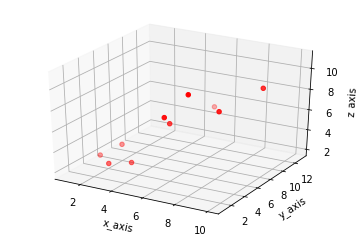

In [7]:
# example 3d plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = [1,2,3,4,5,6,7,8,9,10]
y = [5,6,2,3,13,4,1,2,4,8]
z = [2,3,3,3,5,7,9,11,9,10]

ax.scatter(x, y, z, c='r', marker='o') # scatter plot

ax.set_xlabel('x_axis')
ax.set_ylabel('y_axis')
ax.set_zlabel('z_axis')

plt.show()

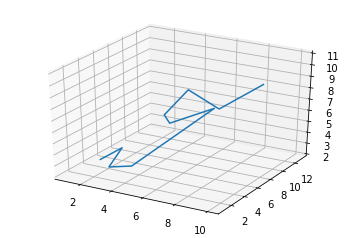

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = [1,2,3,4,5,6,7,8,9,10],[5,6,2,3,13,4,1,2,4,8],[2,3,3,3,5,7,9,11,9,10]
ax.plot(X, Y, Z, label='parametric curve')

plt.show()

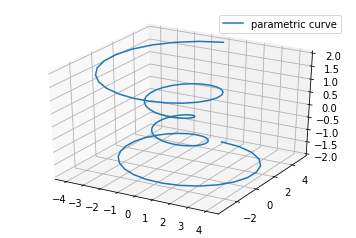

In [9]:
mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()

In [10]:
class MMMDemos(object):
    """A class to store MMM action categories"""
    def __init__(self, files):
        super(MMMDemos, self).__init__()
        self.samples = []
        for file in files:
            print("\nDemonstration: ", file)
            self.samples.append(MMMDataFrame(file))
        
        
class MMMDataFrame(object):
    """
    A class for MMM extracted data frame, 
    in order to carry out analysis on the data contained
    Needs to import xml.etree.ElementTree as ET for xml dependency
    """
    def __init__(self, xml_file, name=None):
        super(MMMDataFrame, self).__init__()
        if name:
            self.name = name
        else:
            self.name = xml_file
        data_tree = ET.parse(xml_file)
        data_root = data_tree.getroot()
        
        # a list to contain all subjects (and objects) in the xml file
        self.subjects = []
        for i, child in enumerate(data_root):
            print(child.tag, child.attrib)
            
            # create subject
            motion_subject = MMMSubject(child.attrib['name'])
            
            # properties
            time_steps = []
            root_positions = []
            root_rotations = []
            joint_positions = []
            
            for gchild in child:
                if gchild.tag=='JointOrder':
                    for ggchild in gchild:
                        joint_order.append(ggchild.attrib['name'])
                if gchild.tag=='MotionFrames':
                    for ggchild in gchild:
                        if ggchild.tag=='MotionFrame':
                            # time_steps
                            time_steps.append([float(x) for x in list(ggchild[0].text.split(' '))][0])
                            # root positions
                            root_positions.append([float(x) for x in list(ggchild[1].text.split(' '))])
                            # root_roations
                            root_rotations.append([float(x) for x in list(ggchild[2].text.split(' '))])
                            try:
                                # joint positions
                                joint_positions.append([float(x) for x in list(ggchild[3].text.split(' '))[:-1]])
                            except IndexError:
                                pass        
            motion_subject.properties['time_steps'] = time_steps
            motion_subject.properties['root_positions'] = root_positions
            motion_subject.properties['root_rotations'] = root_rotations
            motion_subject.properties['joint_positions'] = joint_positions
            self.subjects.append(motion_subject)

class MMMSubject(object):
    """ manage data in MMM subjects """
    def __init__(self, name):
        super(MMMSubject, self).__init__()
        
        # name is given to the subject at initiation
        self.name = name
        
        # create an empty dictionary of properties for the subject
        self.properties = {}

In [11]:
motion_demos = MMMDemos(all_files)


Demonstration:  data\motion_data\files_motions_589\pour01.xml
Motion {'name': 'subject_id_551'}
Motion {'name': 'object_id_558'}
Motion {'name': 'object_id_564'}
Motion {'name': 'object_id_518'}

Demonstration:  data\motion_data\files_motions_589\pour02.xml
Motion {'name': 'subject_id_551'}
Motion {'name': 'object_id_558'}
Motion {'name': 'object_id_564'}
Motion {'name': 'object_id_518'}

Demonstration:  data\motion_data\files_motions_589\pour03.xml
Motion {'name': 'subject_id_551'}
Motion {'name': 'object_id_558'}
Motion {'name': 'object_id_564'}
Motion {'name': 'object_id_518'}

Demonstration:  data\motion_data\files_motions_589\pour04.xml
Motion {'name': 'subject_id_551'}
Motion {'name': 'object_id_558'}
Motion {'name': 'object_id_564'}
Motion {'name': 'object_id_518'}

Demonstration:  data\motion_data\files_motions_589\pour05.xml
Motion {'name': 'subject_id_551'}
Motion {'name': 'object_id_558'}
Motion {'name': 'object_id_564'}
Motion {'name': 'object_id_518'}

Demonstration:  dat

In [12]:
demo_samples = motion_demos.samples
print(skip_index1, skip_index2)

# to access the time steps in a subject of an action demonstration
sample_joint_pose = demo_samples[0].subjects[0].properties['joint_positions'][0]

# print(len(sample_joint_pose))
# del sample_joint_pose[skip_index1]
# print(len(sample_joint_pose))
# del sample_joint_pose[skip_index2-1]

x_data, y_data, z_data = [], [], []
print(len(sample_joint_pose))
for i in range(0, len(sample_joint_pose)-2, 3):
    if i==skip_index1 or i==skip_index2:
        continue
    x_data.append(sample_joint_pose[i])
    y_data.append(sample_joint_pose[i+1])
    z_data.append(sample_joint_pose[i+2])

print(x_data, y_data, z_data)

print(len(x_data), len(y_data), len(z_data))

27 43
44
[-0.130677, 0.159562, 0.0550954, -0.114129, -0.0742467, 0.566766, 0.0594533, -0.303168, -0.12046, -0.0222098, 0.198232, -0.182254, 0.403017] [-0.0909169, -0.0391261, 0.013342, 0.048973, -0.349039, -0.359859, 0.231335, 0.58898, -0.569059, 0.66053, -0.0774349, -0.419565, -0.100494] [-0.158312, 0.0944564, -0.00195049, -0.178207, 0.0442696, 0.200418, -0.152317, -0.511688, 0.00660932, 0.147606, -0.193002, -0.634311, 0.432019]
13 13 13


In [56]:
# we want to extract only the arm informations
demo_samples = motion_demos.samples
print(skip_index1, skip_index2)

# to access the time steps in a subject of an action demonstration
sample_joint_pose = demo_samples[0].subjects[0].properties['joint_positions'][0]

x_data, y_data, z_data = [], [], []

RSx = sample_joint_pose[RSx_id]
RSy = sample_joint_pose[RSy_id]
RSz = sample_joint_pose[RSz_id]

REx = sample_joint_pose[REx_id]
REz = sample_joint_pose[REz_id]
zz = (RSz-REz)
xx = abs(RSx - REx)
print(xx, zz)

fi_sqr = (height*0.188)**2 - zz**2
print(fi_sqr)
yy = math.sqrt(fi_sqr - xx**2)


# # REy = math.sqrt((fi**2 - REx**2))

RWx = sample_joint_pose[RWx_id]
RWy = sample_joint_pose[RWy_id]

# REy = math.sqrt((height*0.188)**2 + REz**2)


27 43
1.080095 0.25541100000000005
0.036909381078999964


ValueError: math domain error

In [28]:
print(REx, REy, REz)

0.66053 0.35203933194459963 0.147606


In [121]:
# plot joint positions
fig = plt.figure()
aax = fig.gca(projection='3d')

aax.scatter(x_data, y_data, z_data)
# aax.plot(x_data, y_data, z_data)
# aax.legend()

# %matplotlib qt
plt.show()

In [138]:
# try to read c3d files
import c3d
cd3data_path = os.path.join('data', 'motion_data', 'files_motions_589')
all_files = glob.glob(cd3data_path+'/**/*[0-9].c3d', recursive=True)
for files in all_files: 
    print(files)
reader = c3d.Reader(open(all_files[0], 'rb'))
for i, points, analog in reader.read_frames():
#     print('frame {}: point {}, analog {}'.format(i, points.shape, analog.shape))
    print(points[0])
#     print(analog)

data/motion_data/files_motions_589/pour02.c3d
data/motion_data/files_motions_589/pour04.c3d
data/motion_data/files_motions_589/pour03.c3d
data/motion_data/files_motions_589/pour01.c3d
data/motion_data/files_motions_589/pour05.c3d
data/motion_data/files_motions_589/pour06.c3d
[-998.24121094  131.43797302  787.28009033    0.            0.        ]
[-998.24420166  131.44697571  787.28210449    0.            0.        ]
[-998.24645996  131.45381165  787.28363037    0.            0.        ]
[-998.24761963  131.45748901  787.28442383    0.            0.        ]
[-998.24786377  131.45831299  787.28448486    0.            0.        ]
[-998.24761963  131.45727539  787.28393555    0.            0.        ]
[-998.24713135  131.45509338  787.28289795    0.            0.        ]
[-998.246521    131.45202637  787.28155518    0.            0.        ]
[-998.2456665   131.44836426  787.27996826    0.            0.        ]
[-998.24493408  131.44491577  787.27856445    0.            0.        ]
[-99

[-998.20343018  131.38467407  787.26635742    0.            0.        ]
[-998.20898438  131.3994751   787.26879883    0.            0.        ]
[-998.21685791  131.42015076  787.2711792     0.            0.        ]
[-998.22784424  131.44543457  787.27325439    0.            0.        ]
[-998.24279785  131.47543335  787.27514648    0.            0.        ]
[-998.2612915   131.51017761  787.27703857    0.            0.        ]
[-998.28143311  131.54771423  787.27868652    0.            0.        ]
[-998.29986572  131.58363342  787.27978516    0.            0.        ]
[-998.31298828  131.6121521   787.27996826    0.            0.        ]
[-998.31793213  131.62788391  787.27923584    0.            0.        ]
[-998.31433105  131.62785339  787.27813721    0.            0.        ]
[-998.30474854  131.61404419  787.27807617    0.            0.        ]
[-998.29486084  131.59571838  787.28186035    0.            0.        ]
[-998.29290771  131.58943176  787.29333496    0.            0.  

[-998.24139404  131.44125366  787.2822876     0.            0.        ]
[-998.24383545  131.44706726  787.28314209    0.            0.        ]
[-998.24597168  131.45263672  787.28387451    0.            0.        ]
[-998.24700928  131.45610046  787.28442383    0.            0.        ]
[-998.24658203  131.45610046  787.28436279    0.            0.        ]
[-998.24487305  131.45243835  787.28344727    0.            0.        ]
[-998.24230957  131.44613647  787.28198242    0.            0.        ]
[-998.23968506  131.43933105  787.2802124     0.            0.        ]
[-998.23797607  131.43463135  787.27886963    0.            0.        ]
[-998.23797607  131.43418884  787.27838135    0.            0.        ]
[-998.2399292   131.43864441  787.27886963    0.            0.        ]
[-998.2434082   131.44671631  787.2802124     0.            0.        ]
[-998.24731445  131.45561218  787.28167725    0.            0.        ]
[-998.25042725  131.46224976  787.28271484    0.            0.  